In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
# Download NLTK stopwords
nltk.download('stopwords')

ImportError: cannot import name 'triu' from 'scipy.linalg' (C:\Users\ramac\anaconda3\anaconda\anaconda\Lib\site-packages\scipy\linalg\__init__.py)

In [3]:
df = pd.read_csv('emails.csv', on_bad_lines='skip') 

In [4]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [5]:
df.shape

(5728, 2)

In [6]:
df['spam'].unique()

array([1, 0], dtype=int64)

Text(0, 0.5, 'count')

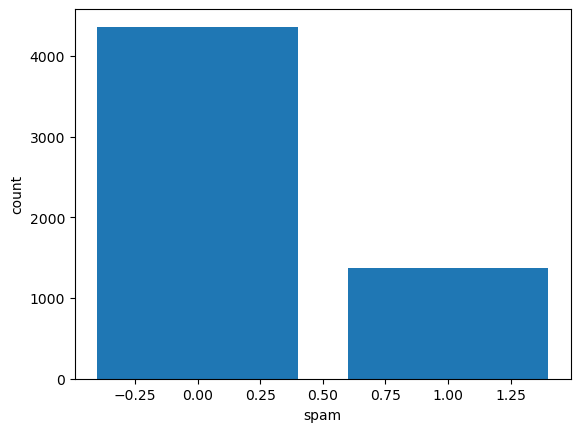

In [11]:
plt.bar(df['spam'].unique(), [df[df['spam'] == 1].shape[0], df[df['spam'] == 0].shape[0]])
plt.xlabel('spam')
plt.ylabel('count')

#### Spams are more

In [15]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [16]:
df.isna().sum()

text    0
spam    0
dtype: int64

#### No Nan values

In [20]:
import string
from nltk.corpus import stopwords

# Download the stopwords if you haven't already
import nltk
nltk.download('stopwords')

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text into words
    words = text.split()
    # Get the set of English stopwords
    stop_words = set(stopwords.words('english'))
    # Remove stopwords
    filtered_words = [word for word in words if word not in stop_words]

    return filtered_words


In [21]:
df['processed_text'] = df['text'].apply(preprocess_text)

In [23]:
df.head()

['subject',
 'naturally',
 'irresistible',
 'your',
 'corporate',
 'identity',
 'lt',
 'is',
 'really',
 'hard',
 'to',
 'recollect',
 'a',
 'company',
 'the',
 'market',
 'is',
 'full',
 'of',
 'suqgestions',
 'and',
 'the',
 'information',
 'isoverwhelminq',
 'but',
 'a',
 'good',
 'catchy',
 'logo',
 'stylish',
 'statlonery',
 'and',
 'outstanding',
 'website',
 'will',
 'make',
 'the',
 'task',
 'much',
 'easier',
 'we',
 'do',
 'not',
 'promise',
 'that',
 'havinq',
 'ordered',
 'a',
 'iogo',
 'your',
 'company',
 'will',
 'automaticaily',
 'become',
 'a',
 'world',
 'ieader',
 'it',
 'isguite',
 'ciear',
 'that',
 'without',
 'good',
 'products',
 'effective',
 'business',
 'organization',
 'and',
 'practicable',
 'aim',
 'it',
 'will',
 'be',
 'hotat',
 'nowadays',
 'market',
 'but',
 'we',
 'do',
 'promise',
 'that',
 'your',
 'marketing',
 'efforts',
 'will',
 'become',
 'much',
 'more',
 'effective',
 'here',
 'is',
 'the',
 'list',
 'of',
 'clear',
 'benefits',
 'creativenes

In [25]:
sentences = df['processed_text'].tolist()

# Train the Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Save the trained model (optional)
model.save("word2vec.model")

# Print the vector for a sample word
word_vector = model.wv['sample'] 

  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl (44.5 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.


In [ ]:
def get_document_vector(text, model):
    # Get word vectors for the words in the document
    word_vectors = [model.wv[word] for word in text if word in model.wv]
    
    # If no word vectors exist (e.g., out-of-vocabulary words), return a zero vector
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)  # Return a zero vector

    # Return the average of the word vectors
    return np.mean(word_vectors, axis=0)

# Generate document vectors for each row in the DataFrame using the pre-trained Word2Vec model
df['document_vector'] = df['processed_text'].apply(lambda x: get_document_vector(x, model))

# Preview the document vectors
print(df[['text', 'document_vector', 'spam']])

In [ ]:
df.shape

In [1]:
X = np.array(df['document_vector'].tolist())
y = np.array(df['spam'])

1.14.1


In [4]:
# Split into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: 'gensim\\'
Hint: It looks like a path. File 'gensim\' does not exist.


In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Train a Logistic Regression model
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Make predictions on the test set
y_pred = model_lr.predict(X_test)

# Evaluate the model using accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

### Predicting the new text it is spam or not

In [ ]:
new_text = "Subject: you won a one million$"
text = preprocess_text(new_text)
new_document_vector = get_document_vector(text, model)

# Reshape the new document vector to match the shape expected by the classifier
new_document_vector = new_document_vector.reshape(1, -1)

# Predict the class of the new text using the trained model
predicted_class = model_lr.predict(new_document_vector)

# Output the prediction
print(f"The predicted class for the new text is: {predicted_class[0]}")

In [ ]:
df.head()

In [ ]:
df['text'][1]